## FOOOF on RCS streaming sessions
Inputs

power spectra outputted from MATLAB per RCS streaming channel

* (leveraging the 'Analysis-rcs-data' toolbox (Sellers et al., 2021 *Front. Hum. Neurosci.*)
* prioritzing a similar onboard RCS power calculation

Goals

Use Fitting Oscillations One and Over F (FOOOF) algorithm to identify band peaks and aperiodic contributions in order to:
* remove aperiodic contributions of 
* see stability of band peak frequency over first month of Stage 1
* leverage aperiodic offset and exponent as plausible representations of the lead settling over the first month
    * before stim is turned on so stim-related transient/lasting spectra effects are NOT confounding (besides lasting stage 0 changes)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import time
import sys
import os
from scipy import stats
import shutil

# FOOOF objects and functions
from fooof import FOOOFGroup, FOOOF
from fooof.bands import Bands
from fooof.plts.spectra import plot_spectrum
from fooof.plts.annotate import plot_annotated_model
from fooof.analysis import get_band_peak_fm, get_band_peak_fg


# RBL functions
from  import_FT_RCS_spectra import import_FT_RCS_spectra
from  RBL_fooof_fxns import  setup_fooof_dirs, plt_save_fooof_analysis, plt_save_avg_peaks

In [2]:
### RBL inputs into general FOOOF approach below:
fooof_param = pd.DataFrame

fooof_param.freq_range = [2, 40] 

fooof_param.err_thresh = 0.15

## FOOOF alogirthim parameters (directly feed into FOOOF object)
fooof_param.peak_width_limits   = [2.0, 6.0]      # narrowest to widest possible peak width
fooof_param.max_n_peaks         = 4               # max number of peaks to fit
fooof_param.min_peak_height     = 0.3            # min power (db) ABOVE flattened spectrum to be considered a peak
fooof_param.peak_threshold      = 2               # min std(s) above flattened spectrum to be considered a peak
fooof_param.aperiodic_mode      ='fixed'          # 'fixed' = 1/(f^x), but 'knee' = 1/(k + f^x)--the latter allows an inflection point in the aperiodic fit

### from FOOF analysis plot/save ACROSS sessions:

* aperiodic fit
    * use RBL's 'plt_save_aperiodic_overtime.py' to analyze longitudinal aperiodic fit changes
     
* relative power spectra (the power spectrum - aperiodic fit)

* fooof parameters
    * aperiodic exponent, and offset
    * periodic center frequecy(ies), power peaks(s), band width(s)
    * model error and r^2
    
* Spearman's correlation of time, aperiodic offset, and exponent



ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: duration, (uint32)
ERROR:root:ERROR: MATLAB type not supported: duration, (uint32)
ERROR:root:ERROR: MATLAB type not supported: duration, (uint32)


/Volumes/DBS Pain 3/rcs_device_data/processed/spectra_per_sess/RCS02R/stage1_only (pp work up)/30s_pre_survey/RCS02R_
(51, 4, 251)
['RACC +2-0', 'RACC +3-1', 'RVPL +10-8', 'RVPL +11-9']
(251,)
/Volumes/DBS Pain 3/rcs_device_data/processed/spectra_per_sess/RCS02R/stage1_only (pp work up)/30s_pre_survey/RCS02R_par_db.xlsx


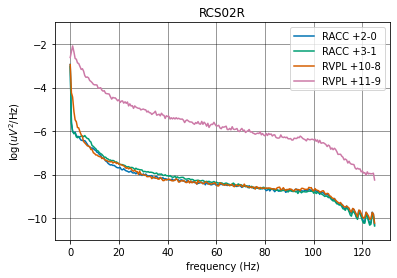

Running FOOOFGroup across 51 power spectra.


ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: duration, (uint32)
ERROR:root:ERROR: MATLAB type not supported: duration, (uint32)
ERROR:root:ERROR: MATLAB type not supported: duration, (uint32)


See:   /Users/Leriche/pia_server/datastore_spirit/human/rcs_chronic_pain/rcs_device_data/ephy_analysis/spectra_per_sess//RCS02R//stage1_only (pp work up)/30s_pre_survey/fooofed (fixed)/error_ge_0.15/
for spectra with model error >0.15
/Volumes/DBS Pain 3/rcs_device_data/processed/spectra_per_sess/RCS04R/stage1_only (pp work up)/30s_pre_survey/RCS04R_
(86, 4, 251)
['RACC +3-0', 'RACC +3-1', 'RTHAL +11-8', 'RTHAL +10-8']
(251,)
/Volumes/DBS Pain 3/rcs_device_data/processed/spectra_per_sess/RCS04R/stage1_only (pp work up)/30s_pre_survey/RCS04R_par_db.xlsx


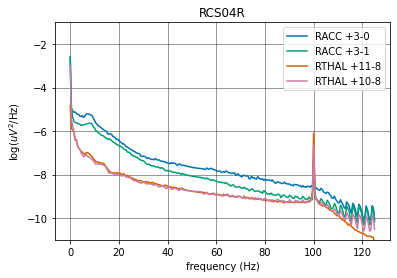

Running FOOOFGroup across 86 power spectra.


ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: duration, (uint32)
ERROR:root:ERROR: MATLAB type not supported: duration, (uint32)
ERROR:root:ERROR: MATLAB type not supported: duration, (uint32)


See:   /Users/Leriche/pia_server/datastore_spirit/human/rcs_chronic_pain/rcs_device_data/ephy_analysis/spectra_per_sess//RCS04R//stage1_only (pp work up)/30s_pre_survey/fooofed (fixed)/error_ge_0.15/
for spectra with model error >0.15
/Volumes/DBS Pain 3/rcs_device_data/processed/spectra_per_sess/RCS04L/stage1_only (pp work up)/30s_pre_survey/RCS04L_
(80, 4, 251)
['LACC +3-0', 'LACC +3-1', 'LCaud +11-8', 'LCaud +11-9']
(251,)
/Volumes/DBS Pain 3/rcs_device_data/processed/spectra_per_sess/RCS04L/stage1_only (pp work up)/30s_pre_survey/RCS04L_par_db.xlsx


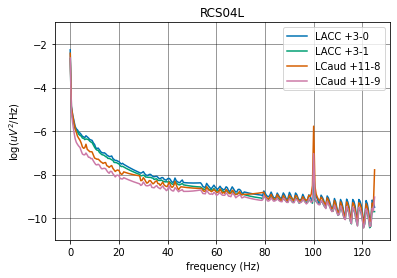

Running FOOOFGroup across 80 power spectra.


ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: duration, (uint32)
ERROR:root:ERROR: MATLAB type not supported: duration, (uint32)
ERROR:root:ERROR: MATLAB type not supported: duration, (uint32)


See:   /Users/Leriche/pia_server/datastore_spirit/human/rcs_chronic_pain/rcs_device_data/ephy_analysis/spectra_per_sess//RCS04L//stage1_only (pp work up)/30s_pre_survey/fooofed (fixed)/error_ge_0.15/
for spectra with model error >0.15
/Volumes/DBS Pain 3/rcs_device_data/processed/spectra_per_sess/RCS05R/stage1_only (pp work up)/30s_pre_survey/RCS05R_
(64, 4, 251)
['RThal +2-0', 'RThal +3-1', 'RIFG +10-8', 'RIFG +11-9']
(251,)
/Volumes/DBS Pain 3/rcs_device_data/processed/spectra_per_sess/RCS05R/stage1_only (pp work up)/30s_pre_survey/RCS05R_par_db.xlsx


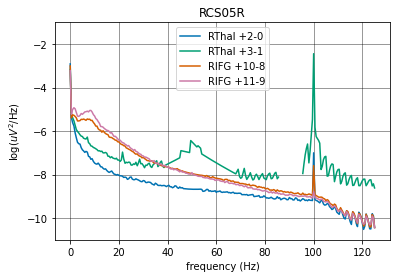

Running FOOOFGroup across 64 power spectra.


ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: duration, (uint32)
ERROR:root:ERROR: MATLAB type not supported: duration, (uint32)
ERROR:root:ERROR: MATLAB type not supported: duration, (uint32)


See:   /Users/Leriche/pia_server/datastore_spirit/human/rcs_chronic_pain/rcs_device_data/ephy_analysis/spectra_per_sess//RCS05R//stage1_only (pp work up)/30s_pre_survey/fooofed (fixed)/error_ge_0.15/
for spectra with model error >0.15
/Volumes/DBS Pain 3/rcs_device_data/processed/spectra_per_sess/RCS05L/stage1_only (pp work up)/30s_pre_survey/RCS05L_
(60, 4, 251)
['LCaud +2-0', 'LCaud +2-1', 'LACC +11-8', 'LACC +11-9']
(251,)
/Volumes/DBS Pain 3/rcs_device_data/processed/spectra_per_sess/RCS05L/stage1_only (pp work up)/30s_pre_survey/RCS05L_par_db.xlsx


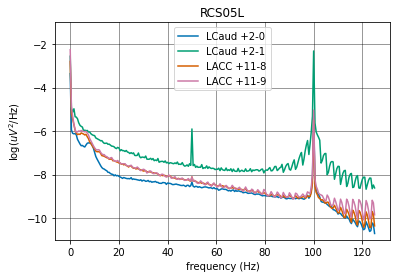

Running FOOOFGroup across 60 power spectra.


ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: duration, (uint32)
ERROR:root:ERROR: MATLAB type not supported: duration, (uint32)
ERROR:root:ERROR: MATLAB type not supported: duration, (uint32)


See:   /Users/Leriche/pia_server/datastore_spirit/human/rcs_chronic_pain/rcs_device_data/ephy_analysis/spectra_per_sess//RCS05L//stage1_only (pp work up)/30s_pre_survey/fooofed (fixed)/error_ge_0.15/
for spectra with model error >0.15
/Volumes/DBS Pain 3/rcs_device_data/processed/spectra_per_sess/RCS06R/stage1_only (pp work up)/30s_pre_survey/RCS06R_
(63, 4, 251)
['RThal +2-0', 'RThal +3-1', 'RSFG +10-8', 'RSFG +11-9']
(251,)
/Volumes/DBS Pain 3/rcs_device_data/processed/spectra_per_sess/RCS06R/stage1_only (pp work up)/30s_pre_survey/RCS06R_par_db.xlsx


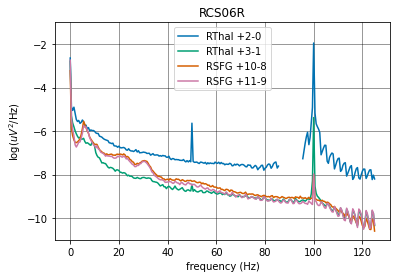

Running FOOOFGroup across 63 power spectra.


ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: duration, (uint32)
ERROR:root:ERROR: MATLAB type not supported: duration, (uint32)
ERROR:root:ERROR: MATLAB type not supported: duration, (uint32)


See:   /Users/Leriche/pia_server/datastore_spirit/human/rcs_chronic_pain/rcs_device_data/ephy_analysis/spectra_per_sess//RCS06R//stage1_only (pp work up)/30s_pre_survey/fooofed (fixed)/error_ge_0.15/
for spectra with model error >0.15
/Volumes/DBS Pain 3/rcs_device_data/processed/spectra_per_sess/RCS06L/stage1_only (pp work up)/30s_pre_survey/RCS06L_
(155, 4, 251)
['LACC +2-0', 'LACC +3-1', 'LCaud +10-8', 'LCaud +11-9']
(251,)
/Volumes/DBS Pain 3/rcs_device_data/processed/spectra_per_sess/RCS06L/stage1_only (pp work up)/30s_pre_survey/RCS06L_par_db.xlsx


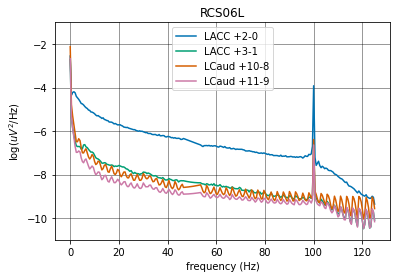

Running FOOOFGroup across 155 power spectra.


ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: duration, (uint32)
ERROR:root:ERROR: MATLAB type not supported: duration, (uint32)
ERROR:root:ERROR: MATLAB type not supported: duration, (uint32)


See:   /Users/Leriche/pia_server/datastore_spirit/human/rcs_chronic_pain/rcs_device_data/ephy_analysis/spectra_per_sess//RCS06L//stage1_only (pp work up)/30s_pre_survey/fooofed (fixed)/error_ge_0.15/
for spectra with model error >0.15
/Volumes/DBS Pain 3/rcs_device_data/processed/spectra_per_sess/RCS07L/stage1_only (pp work up)/30s_pre_survey/RCS07L_
(183, 4, 251)
['LGPi +2-0', 'LGPi +3-1', 'LSGC +10-8', 'LSGC +11-9']
(251,)
/Volumes/DBS Pain 3/rcs_device_data/processed/spectra_per_sess/RCS07L/stage1_only (pp work up)/30s_pre_survey/RCS07L_par_db.xlsx


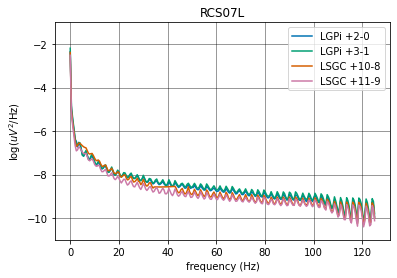

Running FOOOFGroup across 183 power spectra.


ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: duration, (uint32)
ERROR:root:ERROR: MATLAB type not supported: duration, (uint32)
ERROR:root:ERROR: MATLAB type not supported: duration, (uint32)


See:   /Users/Leriche/pia_server/datastore_spirit/human/rcs_chronic_pain/rcs_device_data/ephy_analysis/spectra_per_sess//RCS07L//stage1_only (pp work up)/30s_pre_survey/fooofed (fixed)/error_ge_0.15/
for spectra with model error >0.15
/Volumes/DBS Pain 3/rcs_device_data/processed/spectra_per_sess/RCS07R/stage1_only (pp work up)/30s_pre_survey/RCS07R_
(180, 4, 251)
['RThal +2-0', 'RThal +3-1', 'RSGC +10-8', 'RSGC +11-9']
(251,)
/Volumes/DBS Pain 3/rcs_device_data/processed/spectra_per_sess/RCS07R/stage1_only (pp work up)/30s_pre_survey/RCS07R_par_db.xlsx


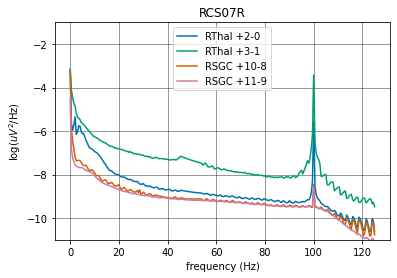

Running FOOOFGroup across 180 power spectra.
See:   /Users/Leriche/pia_server/datastore_spirit/human/rcs_chronic_pain/rcs_device_data/ephy_analysis/spectra_per_sess//RCS07R//stage1_only (pp work up)/30s_pre_survey/fooofed (fixed)/error_ge_0.15/
for spectra with model error >0.15


### MAIN FOOOF analysis end
__________________________________________

# Supervised ML of ambulatory hemisphere spectra from inpatient spectra
Inputs

center frequencies from inpatient and ambulatory spectra (neuro-electrophysiology from the NK and RC+S, respectively)

* both from '1_nk_fooof_spectra' and '1_rcs_fooof_spectra'


Goals

Use Random Forest and/or Logistic Regression to identify pt hemisphere from spectra alone **within inpatient** stage

--> use ML on ambulatory stage (while never using ambulatory stage data in training)


In [405]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier


from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image

import seaborn as sns
sns.set_theme()

In [406]:
ALL_periodic_spectra = pd.concat(periodic_spectra_ls, 
                                 ignore_index=True,
                                  axis =0)

print('shape of "ALL_periodic_spectra" is: ' + str(ALL_periodic_spectra.shape))

n_col      = len(ALL_periodic_spectra.columns)
i_freq_var = np.zeros(n_col, dtype=bool)

for i_col in range(n_col):
    if type(ALL_periodic_spectra.columns[i_col]) == float:
        i_freq_var[i_col] = True

shape of "ALL_periodic_spectra" is: (922, 79)


In [407]:
for i_spec in range(ALL_periodic_spectra.shape[0]):
    
    spec      = ALL_periodic_spectra.iloc[i_spec, i_freq_var]
    spec_mean = np.mean(spec,0)
    
    ALL_periodic_spectra.iloc[i_spec, i_freq_var] = np.array(spec - spec_mean)

In [440]:
min_pwr = np.round(
                    (min(map(min,ALL_periodic_spectra.iloc[:, i_freq_var].values))),
                    1)
max_pwr = np.round(
                   (max(map(max,ALL_periodic_spectra.iloc[:, i_freq_var].values))),
                    1)

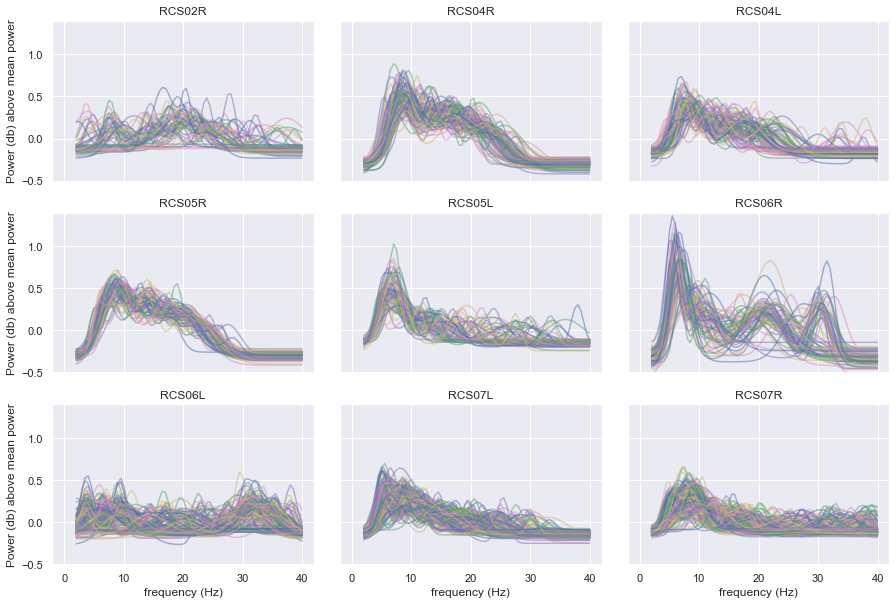

In [453]:
fig, axes = plt.subplots(3,3, figsize=[15,10], sharex=True, sharey=True,
                         gridspec_kw={'hspace': 0.2, 'wspace': 0.1})

# Flatten the axes array to easily iterate over it
axes = axes.flatten()

for i, ax in enumerate(axes):

    i_hemi    =  ALL_periodic_spectra.pt_hemi == pt_sides[i]
    tmp_spec  = ALL_periodic_spectra[i_hemi].reset_index()

    plt_spec = tmp_spec.loc[:, col_names].values

    for i_sess in range(plt_spec.shape[0]):
        ax.plot(freq_oi, plt_spec[i_sess, :], False, alpha=0.5)
        
        plt.ylim([min_pwr, max_pwr])
    ax.set_title(pt_sides[i])
    
    if i % 3 == 0:
        ax.set_ylabel('Power (db) above mean power')
        
    if i >= 6:
        ax.set_xlabel('frequency (Hz)')

In [448]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
                                                    ALL_periodic_spectra.iloc[:, i_freq_var].values,
                                                    ALL_periodic_spectra['pt_hemi'], 
                                                    test_size=0.3,
                                                    random_state=42
                                                    )

In [449]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)


print("Logistic Regression Accuracy:", accuracy_log_reg)

Logistic Regression Accuracy: 0.703971119133574


In [450]:
his_boost = HistGradientBoostingClassifier(max_iter=1000).fit(X_train, y_train)

y_pred_hist   = his_boost.predict(X_test)
accuracy_hist = accuracy_score(y_test, y_pred_hist)
print("HistGradientBoostingClassifier Accuracy:", accuracy_hist)

HistGradientBoostingClassifier Accuracy: 0.6787003610108303


In [451]:
# Random Forest
rf_classifier = RandomForestClassifier(n_estimators=1000)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf     = rf_classifier.predict(X_test)
# Calculate accuracy scores
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.6570397111913358


In [ ]:
### RBL inputs for analyzing periodic activity
# Define frequency bands of interest
bands = Bands({'theta' : [3, 7],
               'alpha' : [8, 12],
               'low_beta' : [13, 20],
               'high_beta': [20, 35]})

In [ ]:
for pb in bands:
    power_bands = get_band_peak_fg(fg, bands[pb[0]])
    
    center_frequencies = power_bands[:, 0 ]
    peak_height        = power_bands[:, 1]
    band_width         = power_bands[:, 2]

In [ ]:
plot_annotated_model(fm)

In [ ]:
cln_spectrum_db = avg_wo_aperiodic +  np.mean(aperiodic_comp,0)

In [ ]:
cln_spectrum = np.power(10, cln_spectrum_db)

In [ ]:
# Initialize a FOOOF model object with defined settings
fm = FOOOF(fooof_param.peak_width_limits=[1.0, 5.0], fooof_param.max_n_peaks=5, fooof_param.min_peak_height=0.1,
           fooof_param.peak_threshold=2, fooof_param.aperiodic_mode='fixed')

fooof_param.freq_range = [1, 80]

# Model the power spectrum with FOOOF, and print out a report
fm.fit(fg.freqs, cln_spectrum, fooof_param.freq_range)
fm.plot(plot_peaks='shade', peak_kwargs={'color' : 'green'})

For demonstrative purposes, the fully annotated FOOOF model parameters

In [ ]:
# Plot an annotated version of the power spectrum model
plot_annotated_model(fm)